In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from scipy.stats import pearsonr

In [36]:
boston_row = pd.read_csv("Boston_Crime_Data.csv")

# Covert OCCURRED_ON_DATE column to Date Time
boston_row['Occurred Date'] = pd.to_datetime(boston_row['OCCURRED_ON_DATE'])

# April, 2015 and June, 2020 only have a half of month's of data, drop these 2 months.
start_date = pd.to_datetime("2015-07-01")
end_date = pd.to_datetime("2020-04-01")
boston = boston_row.loc[(boston_row["Occurred Date"] >= start_date) & (boston_row["Occurred Date"] < end_date)]

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning:

Columns (2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [52]:
# Load the temperature data (first_temp is from 2015 to 2017, and second_temp is from 2018 to 2020)
first_temp = pd.read_csv('Temp_1_Boston.csv')
second_temp = pd.read_csv('Temp_2_Boston.csv')

first_temp['Date'] = pd.to_datetime(first_temp['datetime'])
second_temp['Date'] = pd.to_datetime(second_temp['datetime'])

first_temp = first_temp[['Date', 'temp', 'tempmax','tempmin']]
second_temp = second_temp[['Date', 'temp', 'tempmax','tempmin']]

# Concat both temperature data to one full data from 2015 to 2020
temperature = pd.concat([first_temp, second_temp]).reset_index(drop=True)

In [38]:
# Merge the temperature and Boston Crime Data based on date
boston_row['Date'] = boston_row['Occurred Date'].astype(str)
boston_row['Date'] = boston_row['Date'].str[:10]
boston_row['Date'] = pd.to_datetime(boston_row['Date'])

boston_temp = pd.merge(boston_row, temperature, on = 'Date')

In [39]:
# Define the coldest hour and hottest hour of the day
COLDEST_HOUR = 0
HOTTEST_HOUR = 12

# Calculate the temperature range for each hour of the day
temp_range = boston_temp['tempmax'] - boston_temp['tempmin']
temp_per_hour = temp_range / 12

# Calculate the temperature for each hour of the day
for hour in np.arange(24):
    if hour == COLDEST_HOUR:
        boston_temp.loc[boston_temp['HOUR'] == hour, 'temperature'] = boston_temp['tempmin']
    elif hour == HOTTEST_HOUR:
        boston_temp.loc[boston_temp['HOUR'] == hour, 'temperature'] = boston_temp['tempmax']
    elif hour < HOTTEST_HOUR and hour > COLDEST_HOUR:
        temp_diff = hour - COLDEST_HOUR
        temp_val = boston_temp['tempmin'] + (temp_per_hour * temp_diff)
        boston_temp.loc[boston_temp['HOUR'] == hour, 'temperature'] = temp_val
    else:
        temp_diff = HOTTEST_HOUR - hour
        temp_val = boston_temp['tempmax'] - (temp_per_hour * temp_diff)
        boston_temp.loc[boston_temp['HOUR'] == hour, 'temperature'] = temp_val
boston_temp

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0           I182061268          3201      Property Lost   
1           I172040657          2629         Harassment   
2           I162013546          3201      Property Lost   
3           I152067251          1102              Fraud   
4           I152059178          2647              Other   
...                ...           ...                ...   
476650       202027140          3115                NaN   
476651       202027136          3018                NaN   
476652       202027141           540                NaN   
476653       202027142          3005                NaN   
476654       202027144          3301                NaN   

                    OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0                       PROPERTY - LOST      NaN                     NaN   
1                            HARASSMENT      C11            397      NaN   
2                       PROPERTY - LOST       B3            433      NaN   
3       FRAUD - FALSE PRETENSE / SCHEME       A1             93      NaN   
4             THREATS TO DO BODILY HARM      C11            359      NaN   
...                                 ...      ...            ...      ...   
476650               INVESTIGATE PERSON       B3            429        0   
476651    SICK/INJURED/MEDICAL - POLICE       A1            954        0   
476652            BURGLARY - COMMERICAL       D4            273        0   
476653                      SICK ASSIST      D14            924        0   
476654                   VERBAL DISPUTE       B3            466        0   

       OCCURRED_ON_DATE  YEAR  MONTH  ...            STREET        Lat  \
0        6/15/2015 0:00  2015      6  ...           BERNARD  -1.000000   
1        6/15/2015 0:00  2015      6  ...      MELBOURNE ST  42.291093   
2        6/15/2015 0:00  2015      6  ...        NORFOLK ST  42.283634   
3        6/15/2015 0:00  2015      6  ...   FANEUIL HALL SQ  42.360205   
4        6/15/2015 0:00  2015      6  ...     WASHINGTON ST  42.293606   
...                 ...   ...    ...  ...               ...        ...   
476650   4/15/2020 2:14  2020      4  ...      MOUNTAIN AVE  42.286501   
476651   4/15/2020 2:42  2020      4  ...     COMMERCIAL ST  42.362923   
476652   4/15/2020 3:00  2020      4  ...     WASHINGTON ST  42.335434   
476653   4/15/2020 3:14  2020      4  ...  COMMONWEALTH AVE  42.344472   
476654   4/15/2020 4:34  2020      4  ...        DEERING RD  42.284140   

             Long                     Location       Occurred Date       Date  \
0       -1.000000   (-1.00000000, -1.00000000) 2015-06-15 00:00:00 2015-06-15   
1      -71.065945  (42.29109287, -71.06594539) 2015-06-15 00:00:00 2015-06-15   
2      -71.082813  (42.28363434, -71.08281320) 2015-06-15 00:00:00 2015-06-15   
3      -71.056208  (42.36020464, -71.05620816) 2015-06-15 00:00:00 2015-06-15   
4      -71.071887  (42.29360585, -71.07188650) 2015-06-15 00:00:00 2015-06-15   
...           ...                          ...                 ...        ...   
476650 -71.085665  (42.28650100, -71.08566500) 2020-04-15 02:14:00 2020-04-15   
476651 -71.051802  (42.36292300, -71.05180200) 2020-04-15 02:42:00 2020-04-15   
476652 -71.078402  (42.33543400, -71.07840200) 2020-04-15 03:00:00 2020-04-15   
476653 -71.142738  (42.34447200, -71.14273800) 2020-04-15 03:14:00 2020-04-15   
476654 -71.093051  (42.28414000, -71.09305100) 2020-04-15 04:34:00 2020-04-15   

        temp tempmax tempmin  temperature  
0       57.1    63.0    54.0    54.000000  
1       57.1    63.0    54.0    54.000000  
2       57.1    63.0    54.0    54.000000  
3       57.1    63.0    54.0    54.000000  
4       57.1    63.0    54.0    54.000000  
...      ...     ...     ...          ...  
476650  45.9    52.1    39.9    41.933333  
476651  45.9    52.1    39.9    41.933333  
476652  45.9    52.1    39.9    42.950000  
476653  45.9    52.1    39.9    42.950000  
476654  45.9    52.1    39.9    43.9666

In [40]:
# Count numbers of cases in different severity
severest = len(boston_row[boston_row['UCR_PART'] == 'Part One'])
moderate = len(boston_row[boston_row['UCR_PART'] == 'Part Two'])
least_severe = len(boston_row[boston_row['UCR_PART'] == 'Part Three'])

# Count numbers of shooting and severest case
num_shooting = len(boston_row[(boston_row['SHOOTING'] == 'Y') | (boston_row['SHOOTING'] == 1)])

print('Severst count: ', severest)
print('Moderate count: ', moderate)
print('Least severe count: ', least_severe)
print('Other count: ', len(boston) - (severest + moderate + least_severe))
print('Total number of shooting: ', num_shooting)

Severst count:  80783
Moderate count:  130260
Least severe count:  214042
Other count:  44846
Total number of shooting:  1969


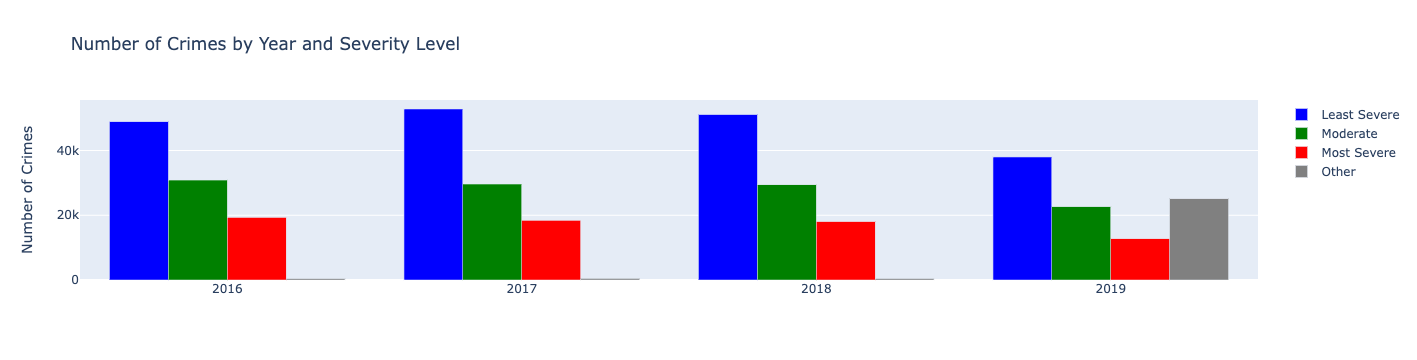

In [41]:
bar = boston.copy()

# Filter data for years 2016-2019
bar = bar[bar['YEAR'].between(2016, 2019)]

# Replace missing UCR_PART with "Other"
bar['UCR_PART'].fillna("Other", inplace=True)

# Rename UCR_PART categories
bar.loc[bar['UCR_PART'] == "Part One", 'UCR_PART'] = "Most Severe"
bar.loc[bar['UCR_PART'] == "Part Two", 'UCR_PART'] = "Moderate"
bar.loc[bar['UCR_PART'] == "Part Three", 'UCR_PART'] = "Least Severe"

# Create dictionary for color mapping
color_dict = {"Most Severe": "red", "Moderate": "green", "Least Severe": "blue", "Other": "gray"}

# Group data by year and UCR_PART and calculate the count
grouped = bar.groupby(['YEAR', 'UCR_PART']).size().reset_index(name='counts')

# Pivot data to prepare for bar chart.
pivoted = grouped.pivot(index='YEAR', columns='UCR_PART', values='counts')

# Sort columns in descending order of Most Severe counts
pivoted = pivoted[pivoted.sum().sort_values(ascending=False).index]

# Create traces for each bar
traces = []
for col in pivoted.columns:
    trace = go.Bar(
        x=pivoted.index,
        y=pivoted[col],
        name=col,
        marker=dict(color=color_dict[col])
    )
    traces.append(trace)

# Create waterfall plot
fig = go.Figure(data=traces)
fig.update_layout(
    title="Number of Crimes by Year and Severity Level",
    yaxis_title="Number of Crimes"
)

fig.show()

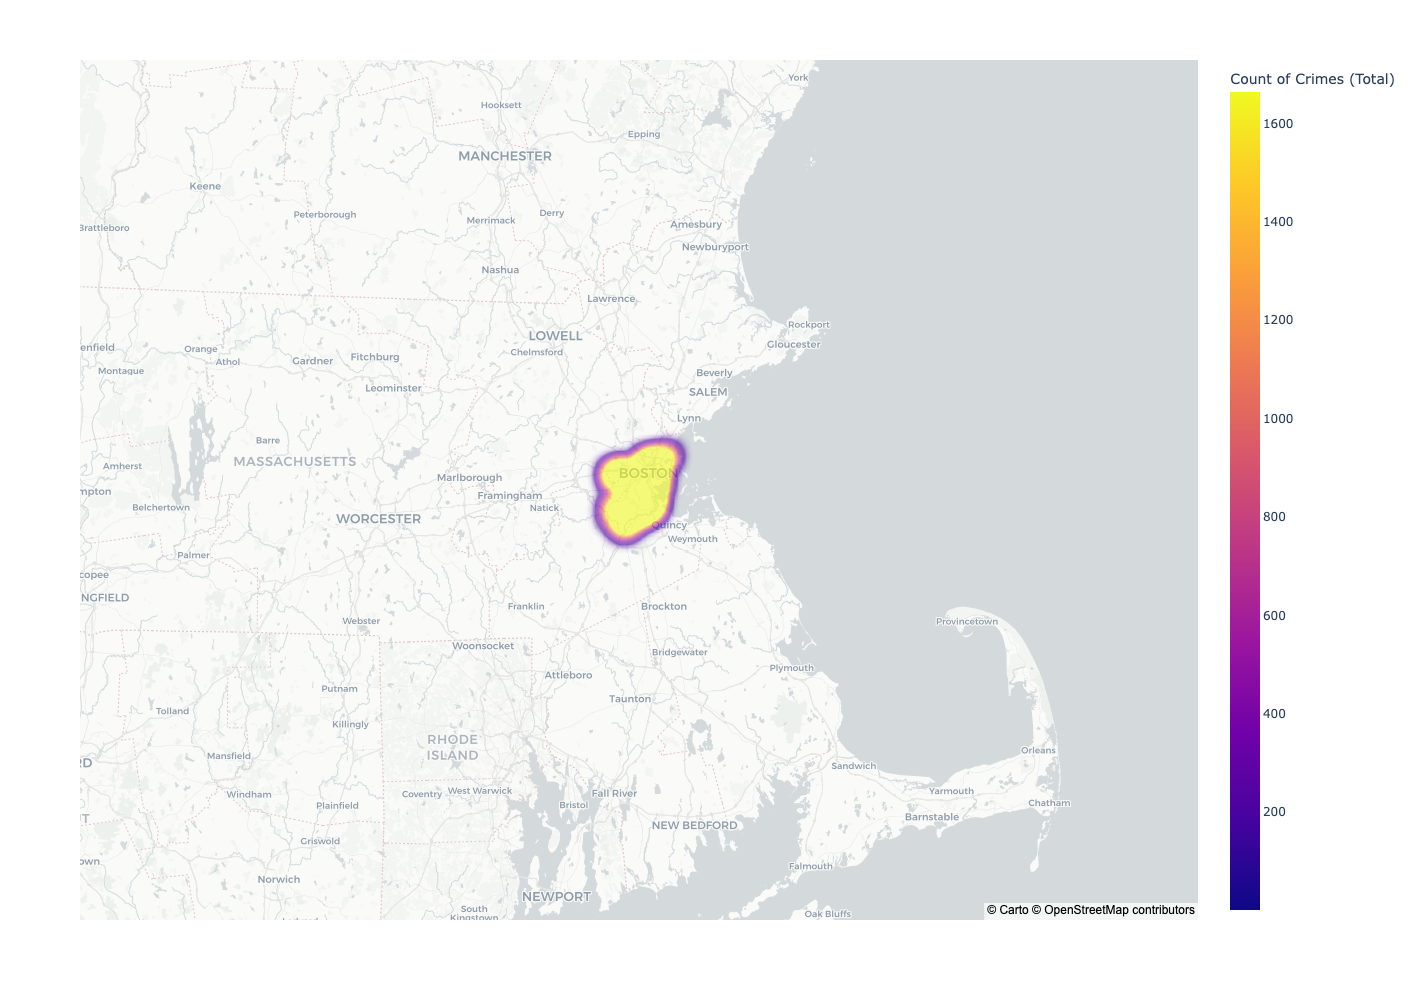

In [42]:
# Some of the cases are losing location variables, thus we create another table that contains locations so we can perform 
# heat map afterward.
boston_copy = boston.copy()
max_lat = 43
min_lat = 41
max_lon = -70
min_lon = -72

# Remove the cases that do not have location information
have_locations = (boston_copy[(boston_copy['Lat'] <= max_lat) & (boston_copy['Lat'] >= min_lat) &
                        (boston_copy['Long'] <= max_lon) & (boston_copy['Long'] >= min_lon)])

# Count the number of crime activites according to the latitudes and longitude
have_location = have_locations.groupby(['Long','Lat'], as_index=False).count()
have_location = have_location.loc[:,['Long', 'Lat', 'YEAR']]
have_location = have_location.rename(columns = {'YEAR':'Count of Crimes (Total)'})

# Create the heat map of count of crime activities in Boston
fig = px.density_mapbox(have_location, lat='Lat', lon='Long', z='Count of Crimes (Total)',
                        mapbox_style="carto-positron", opacity = 0.6, radius = 25)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

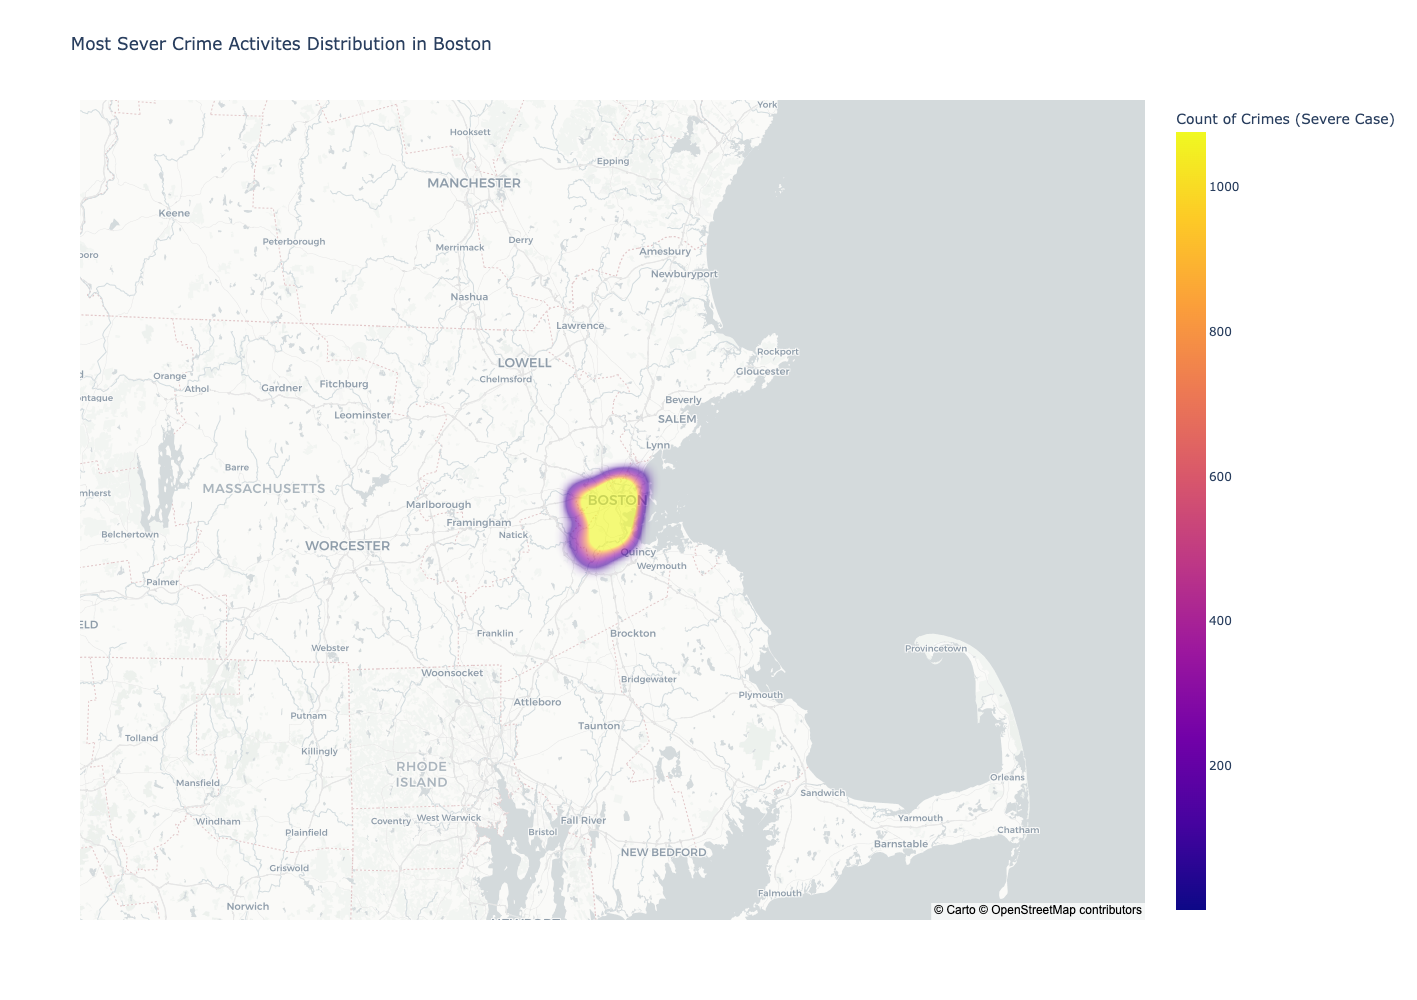

In [43]:
# Demonstrate UCR_PART Part One distribution on the heat map

level_one = have_locations[have_locations['UCR_PART'] == 'Part One']
level_one = level_one.groupby(['Long','Lat']).size().reset_index(name = 'Count of Crimes (Severe Case)')
fig = px.density_mapbox(level_one, lat = 'Lat', lon = 'Long', z = 'Count of Crimes (Severe Case)',
                       mapbox_style="carto-positron", opacity = 0.6, center = {'lat':42.33346,'lon':-71.07502},
                       title = 'Most Sever Crime Activites Distribution in Boston')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

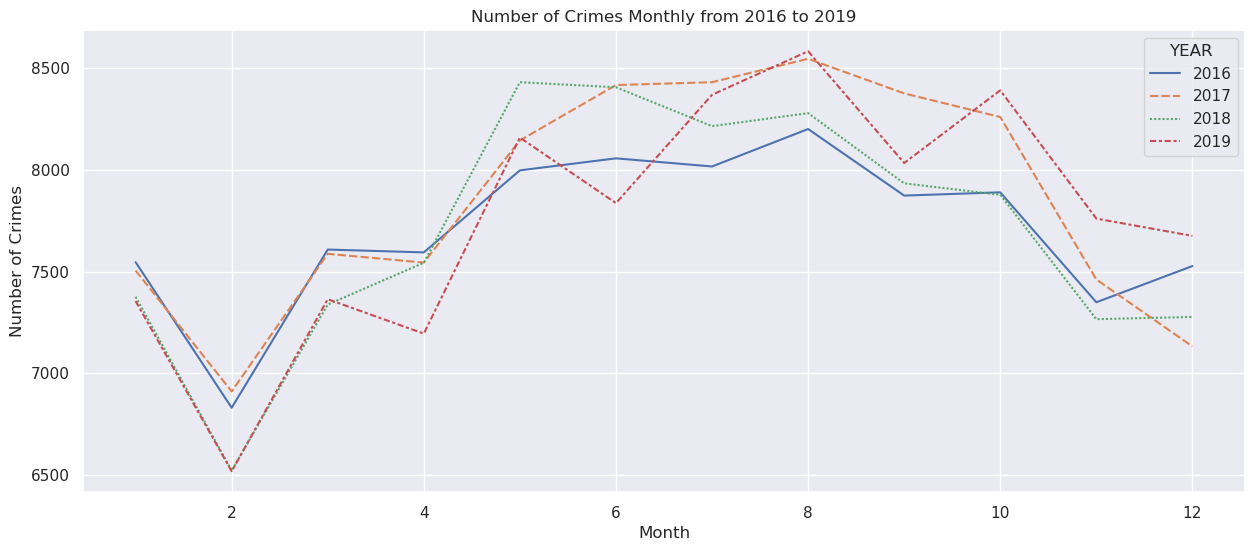

In [44]:
# Load data into a pandas dataframe
annual_count = boston.copy()

# Only use data from 2016 to 2019
annual_count = annual_count[annual_count['YEAR'].between(2016,2019)]
# Create a pivot table with the count of offenses by year and month
pivot_table = pd.pivot_table(annual_count, values='Lat', index='MONTH', columns='YEAR', aggfunc='count')

# Create a line plot
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=pivot_table)

# Set the plot title and axis labels
plt.title('Number of Crimes Monthly from 2016 to 2019')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show();

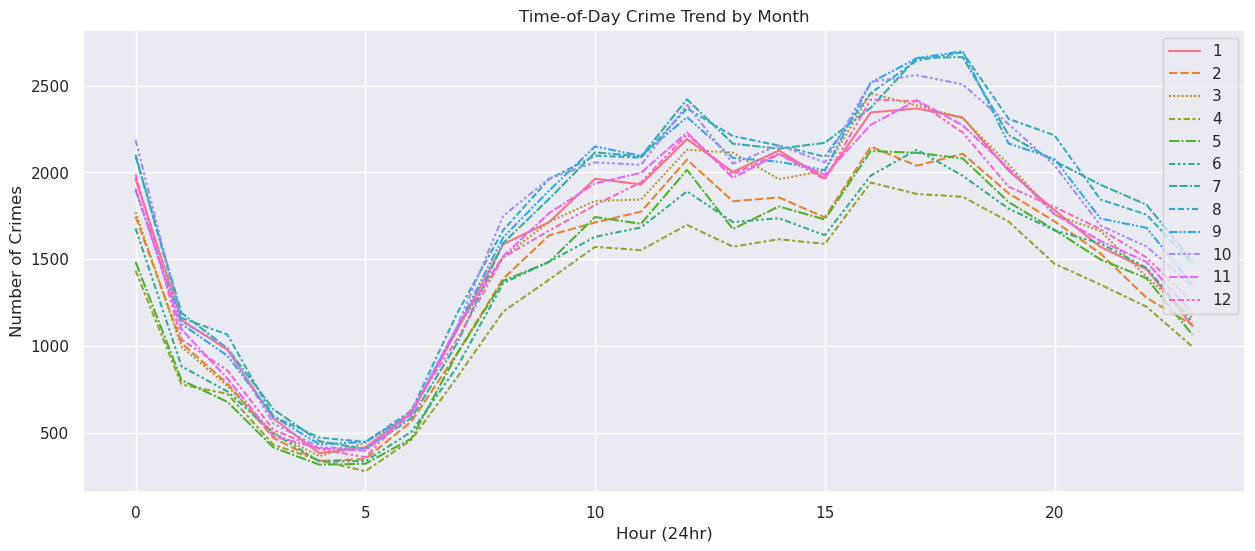

In [45]:
# Load data into a pandas dataframe
monthly_count = boston.copy()

# Create a pivot table with the count of offenses by year and month
pivot_table = pd.pivot_table(monthly_count, values='Lat', index='HOUR', columns='MONTH', aggfunc='count')

# Create a line plot
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=pivot_table)

# Set the plot title and axis labels
plt.title('Time-of-Day Crime Trend by Month')
plt.xlabel('Hour (24hr)')
plt.ylabel('Number of Crimes')
plt.legend(loc='upper right')
plt.show();

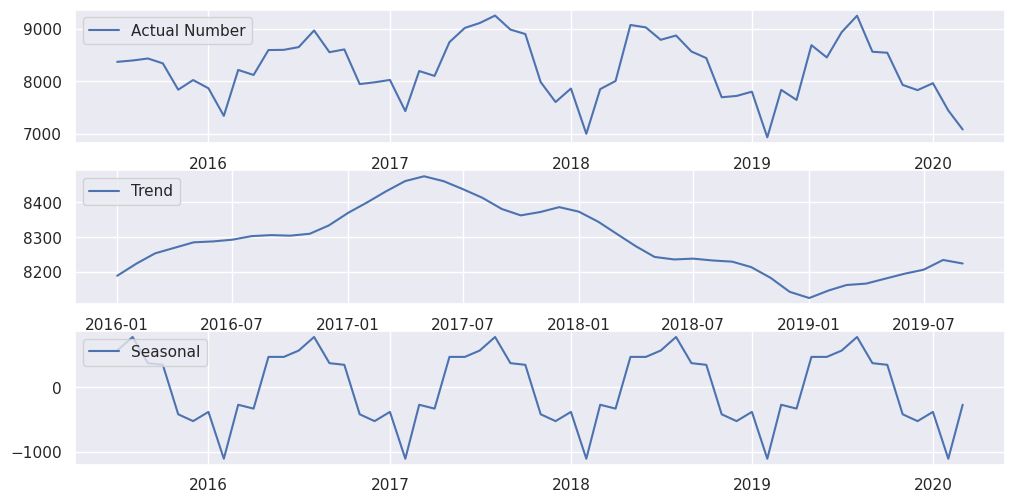

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
seasonal = boston.copy()

# Group the data by year and month
df_monthly = seasonal.groupby(["YEAR", "MONTH"]).size().reset_index(name="Count")

# Set the date index for seasonal decomposition
df_monthly.index = pd.date_range(start='2015-07-01', end = '2020-03-01', freq='MS')

# Perform seasonal decomposition
result = seasonal_decompose(df_monthly["Count"], model="additive")

# Plot the decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_monthly["Count"], label="Actual Number")
plt.legend(loc="upper left")
plt.subplot(412)
plt.plot(result.trend, label="Trend")
plt.legend(loc="upper left")
plt.subplot(413)
plt.plot(result.seasonal, label="Seasonal")
plt.legend(loc="upper left");

In [47]:
# Identify if there is correlation between temperature and count of crime

# Round the temperature and group by it.
boston_temp['temp'] = np.round(boston_temp['temperature'])
group_temperature = boston_temp.groupby(['temp'], as_index = False).count().rename(columns = {'Lat': 'count'})
group_temperature = group_temperature[['temp','count']]

group_temperature

temp  count
0     -9.0     10
1     -7.0     13
2     -6.0      8
3     -4.0      3
4     -2.0     14
..     ...    ...
123  117.0     77
124  118.0     69
125  119.0     29
126  120.0     20
127  121.0      6

[128 rows x 2 columns]

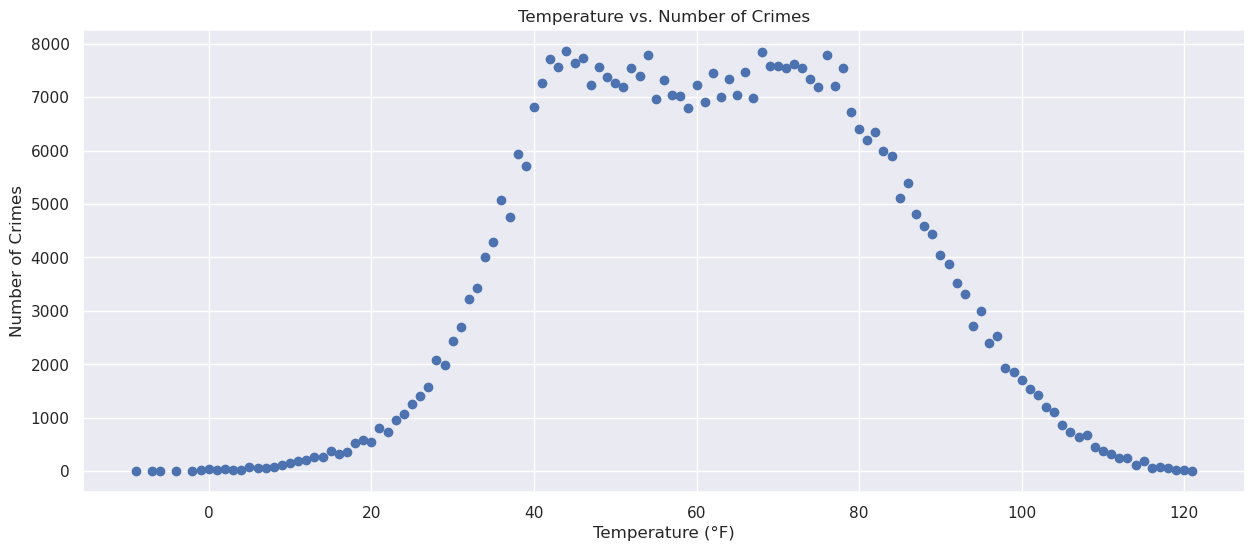

In [48]:
# Create a scatter plot with temperature on the x-axis and num_crimes on the y-axis
plt.scatter(group_temperature['temp'], group_temperature['count'])

# Add a title and labels for the x and y-axes
plt.title('Temperature vs. Number of Crimes')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Crimes')
plt.show();

In [49]:
# Identify the outliers of the temperature and exclude them.

average_temp = group_temperature[group_temperature['temp'].between(20,80)]
average_temp

temp  count
26  20.0    555
27  21.0    818
28  22.0    745
29  23.0    959
30  24.0   1065
..   ...    ...
82  76.0   7789
83  77.0   7200
84  78.0   7547
85  79.0   6716
86  80.0   6410

[61 rows x 2 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


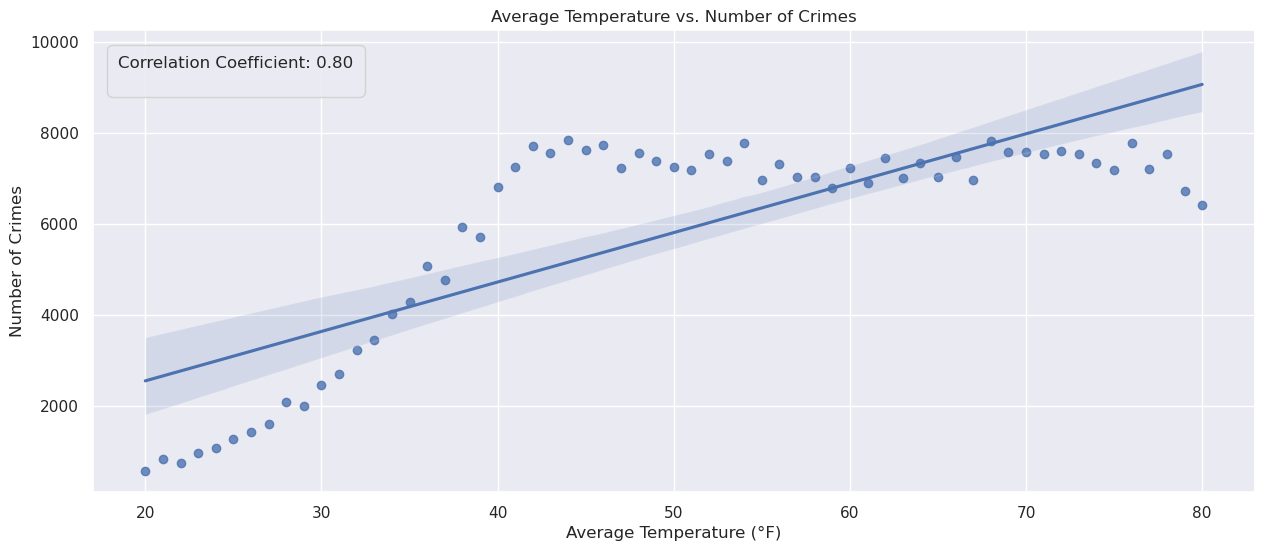

In [50]:
# Create scatter plot with regression line and 95% confidence interval
sns.regplot(x='temp', y='count', data=average_temp)

# Add a title and labels for the x and y-axes
plt.title('Average Temperature vs. Number of Crimes')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Number of Crimes')

# Calculate the correlation coefficient
corr_coef = np.corrcoef(average_temp['temp'], average_temp['count'])[0,1]

# Add a text box with the correlation coefficient
plt.legend(title=f"Correlation Coefficient: {corr_coef:.2f}", loc='upper left', fontsize = 'xx-large')
plt.show()


In [51]:
corr_coef = np.corrcoef(average_temp['temp'], average_temp['count'])[0,1]

# Calculate the best-fit line using a linear regression model
slope, intercept = np.polyfit(average_temp['temp'], average_temp['count'], 1)

# print the correlation coefficient and the slope and intercept of the best-fit line
print(f"Correlation Coefficient: {corr_coef:.2f}")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

Correlation Coefficient: 0.80
Slope: 108.82
Intercept: 368.99
